In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
import numpy as np

In [2]:
no_adv_pth = "test_log/no_adv.pth"

In [3]:
with open(no_adv_pth, 'rb') as f:
    no_adv = pickle.load(f)

In [14]:
hyps = ["Default", "1", "2", "3", "1+2", "1+3", "2+3", "1+2+3"]
configs = ["cross_entropy_loss", "proposed_loss", "cross_entropy_loss_random_noise", "cross_entropy_loss_cutout", "proposed_loss_random_noise", "proposed_loss_cutout", "cross_entropy_loss_random_noise_cutout", "proposed_loss_random_noise_cutout"]

In [3]:
no_adv = {}
no_adv["cross_entropy_loss"] = {"combined__accuracy": 55.81, "clean__accuracy": 99.57, "fgsm__accuracy": 51.36, "pgd__accuracy": 15.86}

In [4]:
no_adv["proposed_loss"] = {"combined__accuracy": 84.42, "clean__accuracy": 99.49, "fgsm__accuracy": 88.40, "pgd__accuracy": 50.74}

In [5]:
no_adv["cross_entropy_loss_random_noise"] = {
    "combined__accuracy": 70.34,
    "clean__accuracy": 99.58,
    "fgsm__accuracy": 69.74,
    "pgd__accuracy": 41.79
}

In [6]:
no_adv["proposed_loss_random_noise"] = {
    "combined__accuracy": 84.49,
    "clean__accuracy": 99.42,
    "fgsm__accuracy": 85.98,
    "pgd__accuracy": 68.07
}

In [7]:
no_adv["cross_entropy_loss_cutout"] = {
    "combined__accuracy": 62.59,
    "clean__accuracy": 99.58,
    "fgsm__accuracy": 72.71,
    "pgd__accuracy": 16.07
}

In [8]:
no_adv["proposed_loss_cutout"] = {
    "combined__accuracy": 74.35,
    "clean__accuracy": 99.58,
    "fgsm__accuracy": 88.53,
    "pgd__accuracy": 34.94
}

In [9]:
no_adv["cross_entropy_loss_random_noise_cutout"] = {
    "combined__accuracy": 69.69,
    "clean__accuracy": 99.51,
    "fgsm__accuracy": 75.85,
    "pgd__accuracy": 33.7
}

In [10]:
no_adv["proposed_loss_random_noise_cutout"] = {
    "combined__accuracy": 87.41,
    "clean__accuracy": 99.57,
    "fgsm__accuracy": 91,
    "pgd__accuracy": 71.67
}

In [19]:
def graph(dictionary, metric = "__accuracy", title = "Test Accuracy"):
    metrics = ["clean", "fgsm", "pgd"]
    metrics = [x_ + metric for x_ in metrics]
    fig, ax = plt.subplots(figsize = (12, 6))
    
    values = {}
    for metric in metrics:
        values[metric] = []

    for config in configs:
        for metric in metrics:
            value = values[metric]
            value.append(dictionary[config][metric])
            values[metric] = value
    
    for key in values:
        ax.plot(hyps, np.array(values[key]) / 100, label = key)
        
    ax.legend()
    ax.grid(True, which = 'both')
    ax.set_ylabel(title)
    ax.set_xlabel("Hypotheses")
    
    # show x & y axis
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.tight_layout()
    plt.show()

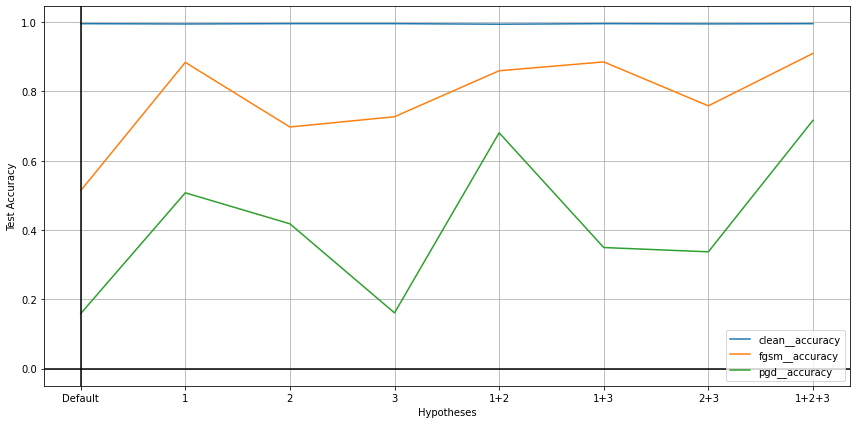

In [20]:
graph(no_adv)